# Color Extraction and Image Segmentation

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

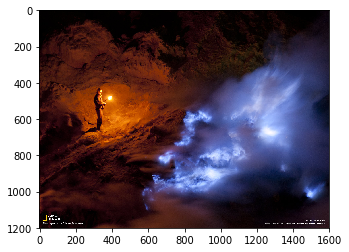

(1920000, 3)


In [6]:
im = cv2.imread("/Users/Pratulya/Desktop/16.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [5]:
k = 3
kmeans = KMeans(k)

In [7]:
kmeans.fit(reshaped_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[ 35,  15,  22],
       [100, 113, 180],
       [133,  53,  14]], dtype=uint8)

In [15]:
np.zeros_like(reshaped_im).shape

(1920000, 3)

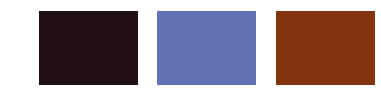

In [19]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
    